In [1959]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
import sys
from sklearn import linear_model, neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from scipy.stats import ttest_1samp
import researchpy as rp
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt



In [1960]:
dataG = pd.read_csv("/Users/lijiayi/Desktop/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001)000000.csv")#Find file path
print("-------------------------------------------")
print(dataG)

-------------------------------------------
       Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
1             2020    July-Sept  1014562  6056669.0    326622   
2             2020      Oct-Dec  1029922  6057065.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
4             2021      Jan-Mar  1015512  6040372.0    327535   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
0                  White   M      Aged 35 to 44 years   
1                  White   M      Aged 35 to 44 years   
2   

In [1961]:
#Describe data
dataG.describe()


,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [1962]:
dataG.describe(include = 'object')

,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,Occurrence_Category
count,65276,65272,65276,65252,65276,65276,65111
unique,4,8,3,9,3,18,31
top,Jan-Mar,White,M,Aged 25 to 34 years,Not a youth,XX,Assault
freq,17613,27723,52650,20949,62234,29646,7726


In [1963]:
df = dataG.fillna('Unknown',inplace=True)
print(df)

None


In [1964]:
e = dataG
c = e.isnull().sum()
print(c)

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64


In [1965]:
col = dataG['PersonID']
counts = col.value_counts()
a = dataG.insert(7,"cc","counts")
print(a)


None


In [1966]:
col_9= dataG['Perceived_Race']
counts_9 = col_9.value_counts()
print(counts_9)

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Unknown                     4
Name: Perceived_Race, dtype: int64


/var/folders/vv/wd3z4vz53611q89t7q1j0cwh0000gn/T/ipykernel_37195/1224120748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataG.corr(),annot=True,cmap='Blues_r')


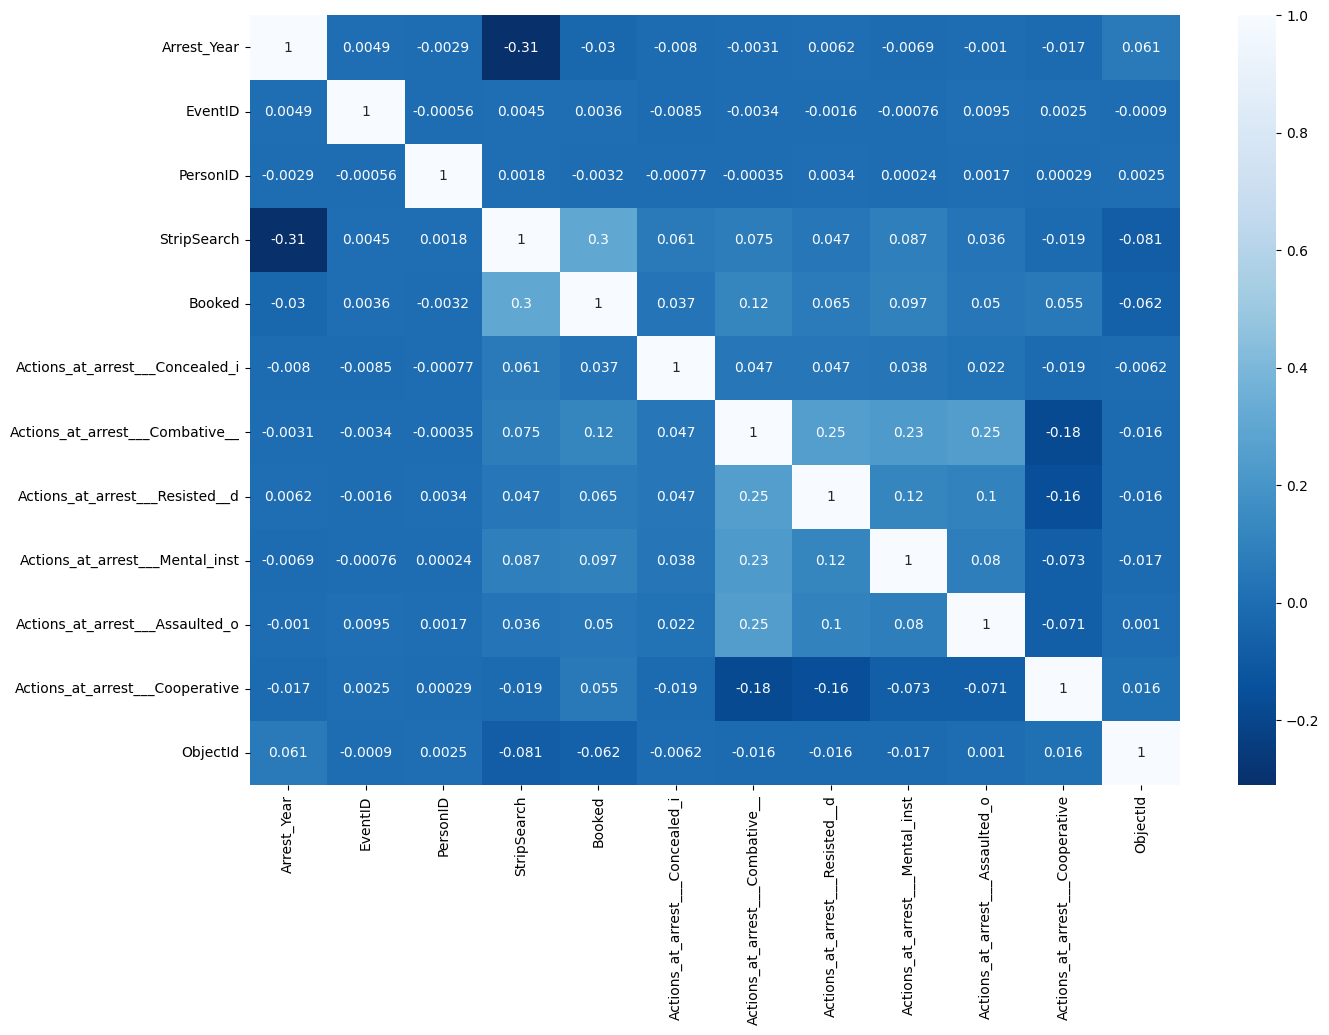

In [1967]:
plt.figure(figsize=(15,10))
sns.heatmap(dataG.corr(),annot=True,cmap='Blues_r')
plt.show()

In [1968]:

dataG.loc[dataG.Sex == 'M', 'Sex'] = 1
dataG.loc[dataG.Sex == 'F', 'Sex'] = 2
dataG.loc[dataG.Sex == 'U', 'Sex'] = 3

In [1969]:
mean_sex = dataG["Sex"].mean()
print(mean_sex)

std_sex = dataG["Sex"].std()
print(std_sex)

1.1935627183038175
0.3954419554933452


In [1970]:
dataG.loc[dataG.Perceived_Race == 'White', 'Perceived_Race'] = 1
dataG.loc[dataG.Perceived_Race == 'Black', 'Perceived_Race'] = 2
dataG.loc[dataG.Perceived_Race == 'South Asian', 'Perceived_Race'] = 3

dataG.loc[dataG.Perceived_Race == 'Indigenous', 'Perceived_Race'] = 4
dataG.loc[dataG.Perceived_Race == 'Middle-Eastern', 'Perceived_Race'] = 5
dataG.loc[dataG.Perceived_Race == 'Unknown or Legacy', 'Perceived_Race'] = 6

dataG.loc[dataG.Perceived_Race == 'Latino', 'Perceived_Race'] = 7
dataG.loc[dataG.Perceived_Race == 'East/Southeast Asian', 'Perceived_Race'] = 8

dataG.loc[dataG.Perceived_Race == 'Unknown', 'Perceived_Race'] = 9


In [1971]:

mean_Perceived_Race = dataG["Perceived_Race"].mean()
print(mean_Perceived_Race)

std_Perceived_Race = dataG["Perceived_Race"].std()
print(std_Perceived_Race)

2.690161774618543
2.218768594792442


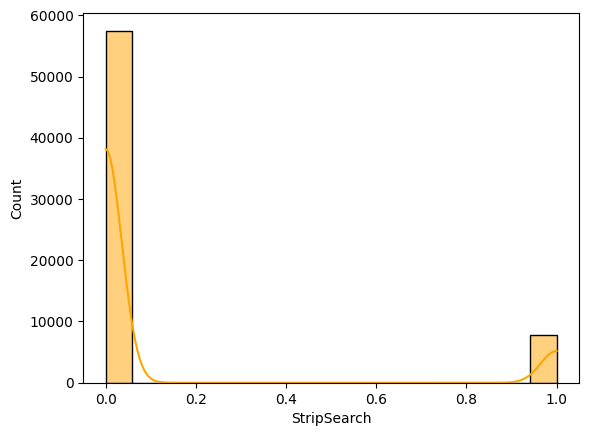

In [1972]:
sns.histplot(dataG['StripSearch'], kde=True, color='orange')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

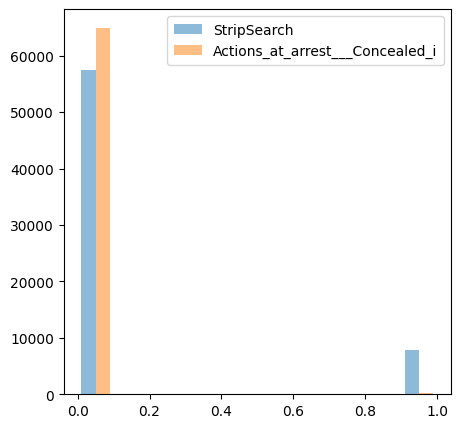

In [1973]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Concealed_i']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Concealed_i'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

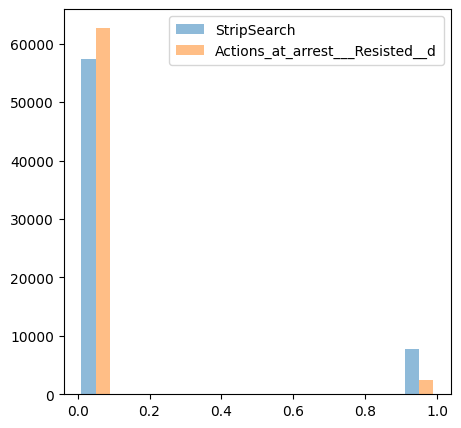

In [1974]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Resisted__d']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Resisted__d'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

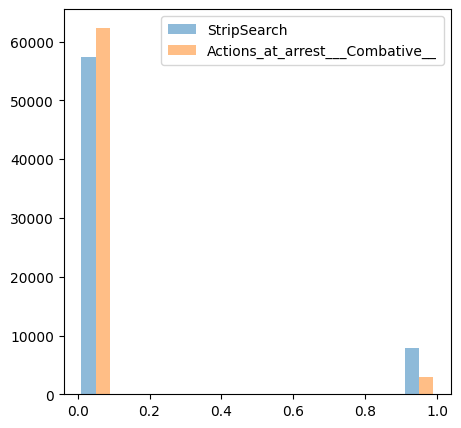

In [1975]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Combative__']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Combative__'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

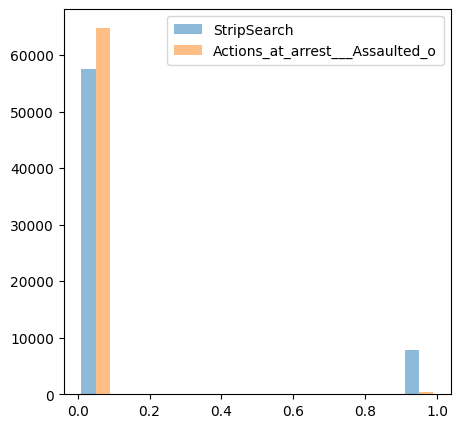

In [1976]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Assaulted_o']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Assaulted_o'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

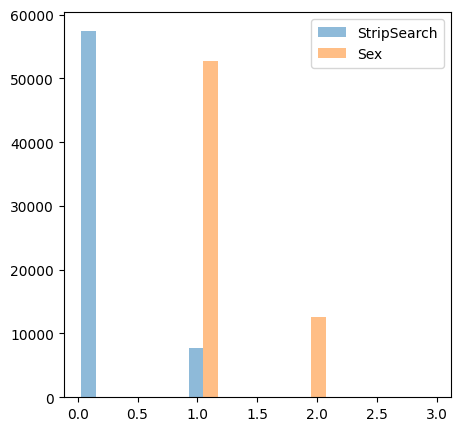

In [1977]:
x1 =dataG['StripSearch']
x2 = dataG['Sex']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Sex'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

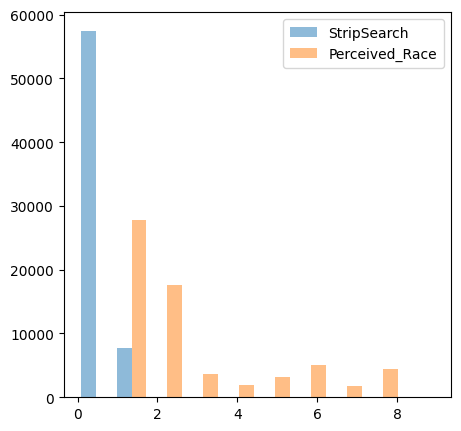

In [1978]:
x1 =dataG['StripSearch']
x2 = dataG['Perceived_Race']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Perceived_Race'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

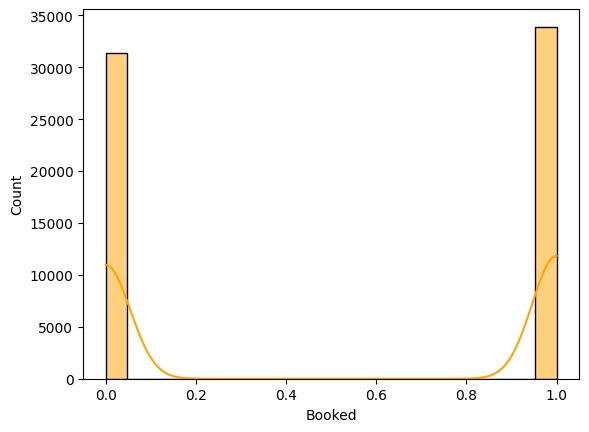

In [1979]:
sns.histplot(dataG['Booked'], kde=True, color='orange')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

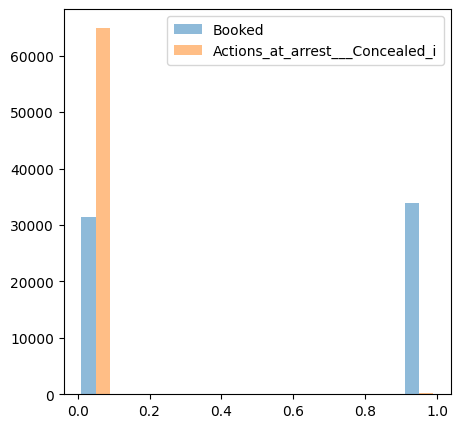

In [1980]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Concealed_i']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Concealed_i'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

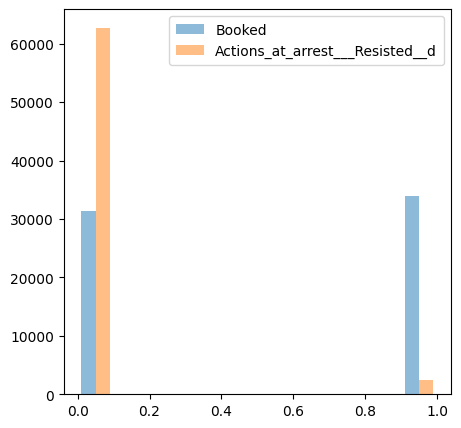

In [1981]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Resisted__d']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Resisted__d'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

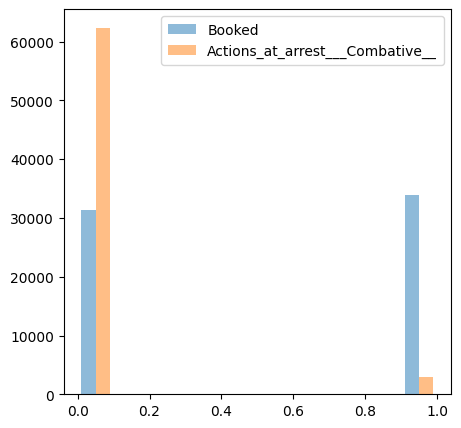

In [1982]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Combative__']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Combative__'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

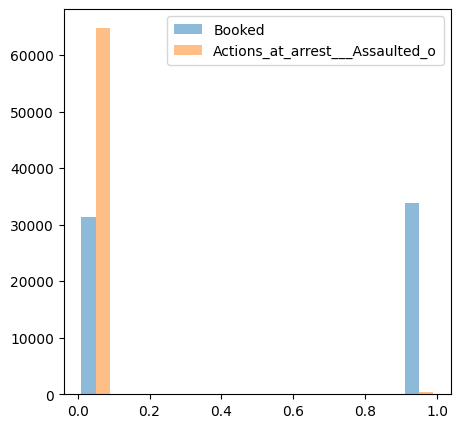

In [1983]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Assaulted_o']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Assaulted_o'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

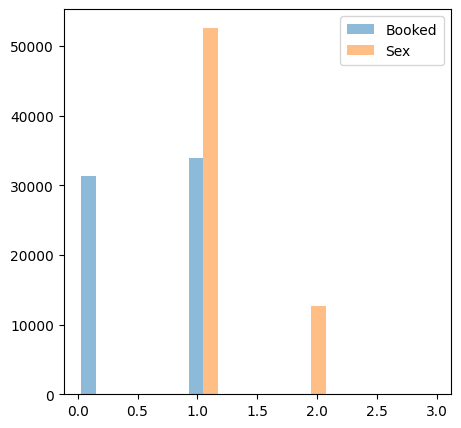

In [1984]:
x1 =dataG['Booked']
x2 = dataG['Sex']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Sex'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

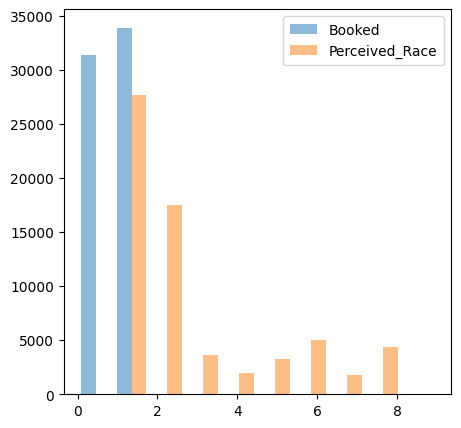

In [1985]:
x1 =dataG['Booked']
x2 = dataG['Perceived_Race']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Perceived_Race'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

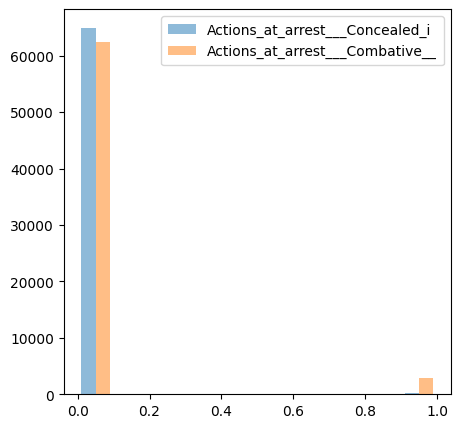

In [1986]:
x1 =dataG['Actions_at_arrest___Concealed_i']
x2 = dataG['Actions_at_arrest___Combative__']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

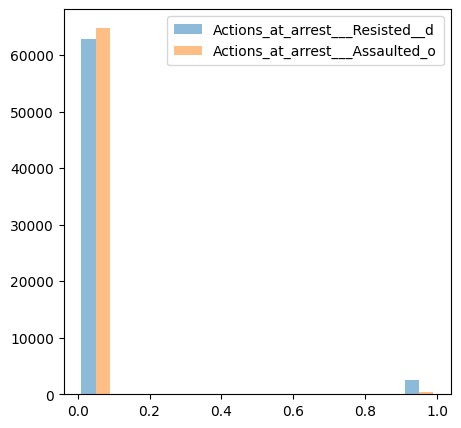

In [1987]:
x1 =dataG['Actions_at_arrest___Resisted__d']
x2 = dataG['Actions_at_arrest___Assaulted_o']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Actions_at_arrest___Resisted__d','Actions_at_arrest___Assaulted_o'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

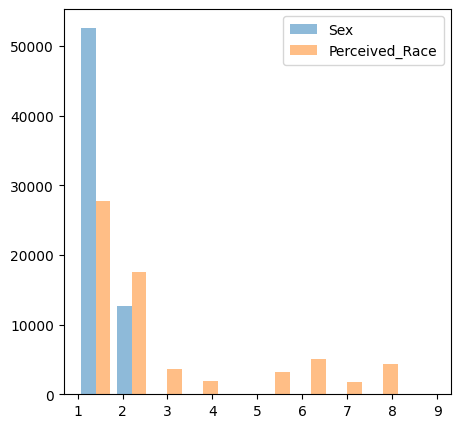

In [1988]:
x1 =dataG['Sex']
x2 = dataG['Perceived_Race']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Sex','Perceived_Race'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

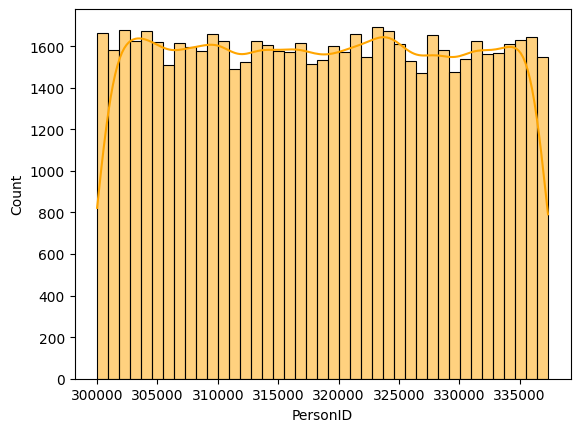

In [1989]:
sns.histplot(dataG['PersonID'], kde=True, color='orange')
plt.show()

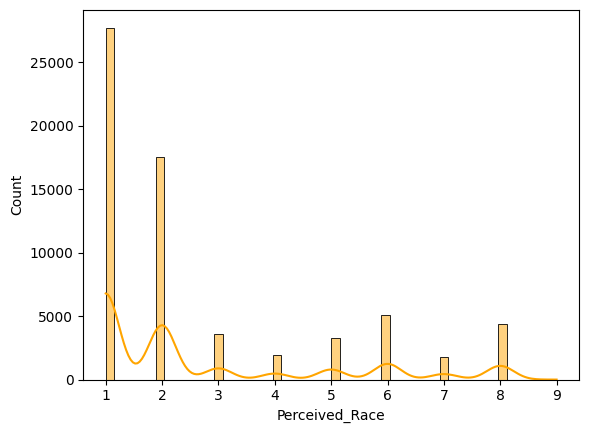

In [1990]:
sns.histplot(dataG['Perceived_Race'], kde=True, color='orange')
plt.show()

In [1991]:
#one sample t test
mean_booked = dataG["Booked"].mean()
print(mean_booked)

0.5195018077088057


In [1992]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Booked'],mean_booked)
print(t_stat)
print(p_val)


0.0
1.0


In [1993]:
#one sample t test
mean_Actions_at_arrest___Concealed_i = dataG["Actions_at_arrest___Concealed_i"].mean()
print(mean_Actions_at_arrest___Concealed_i)

0.004075004595869845


In [1994]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Concealed_i'],mean_Actions_at_arrest___Concealed_i)
print(t_stat)
print(p_val)

0.0
1.0


In [1995]:
#one sample t test
mean_Actions_at_arrest___Combative__ = dataG["Actions_at_arrest___Combative__"].mean()
print(mean_Actions_at_arrest___Combative__)

0.044135670077823395


In [1996]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Combative__'],mean_Actions_at_arrest___Combative__)
print(t_stat)
print(p_val)

0.0
1.0


In [1997]:
#one sample t test
mean_Actions_at_arrest___Resisted__d = dataG["Actions_at_arrest___Resisted__d"].mean()
print(mean_Actions_at_arrest___Resisted__d)

0.03832955450701636


In [1998]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Resisted__d'],mean_Actions_at_arrest___Resisted__d)
print(t_stat)
print(p_val)

0.0
1.0


In [1999]:
#one sample t test
mean_Actions_at_arrest___Mental_inst = dataG["Actions_at_arrest___Assaulted_o"].mean()
print(mean_Actions_at_arrest___Mental_inst)
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Assaulted_o'],mean_Actions_at_arrest___Mental_inst)
print(t_stat)
print(p_val)

0.006357619952202954
0.0
1.0


In [2000]:
#anova
model = ols('Booked ~ Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__+ Actions_at_arrest___Concealed_i:Actions_at_arrest___Combative__', data=dataG).fit()

In [2001]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                                          sum_sq       df  \
Actions_at_arrest___Concealed_i                        16.219802      1.0   
Actions_at_arrest___Combative__                       212.229609      1.0   
Actions_at_arrest___Concealed_i:Actions_at_arre...      1.818976      1.0   
Residual                                            16057.853791  65272.0   

                                                             F         PR(>F)  
Actions_at_arrest___Concealed_i                      65.930288   4.752328e-16  
Actions_at_arrest___Combative__                     862.671390  2.171501e-188  
Actions_at_arrest___Concealed_i:Actions_at_arre...    7.393779   6.546714e-03  
Residual                                                   NaN            NaN  


In [2002]:
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Concealed_i'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Combative__'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1     0.29   0.0 0.2298 0.3501   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
     0      1   0.2815   0.0 0.263 0.3001   True
------------------------------------------------


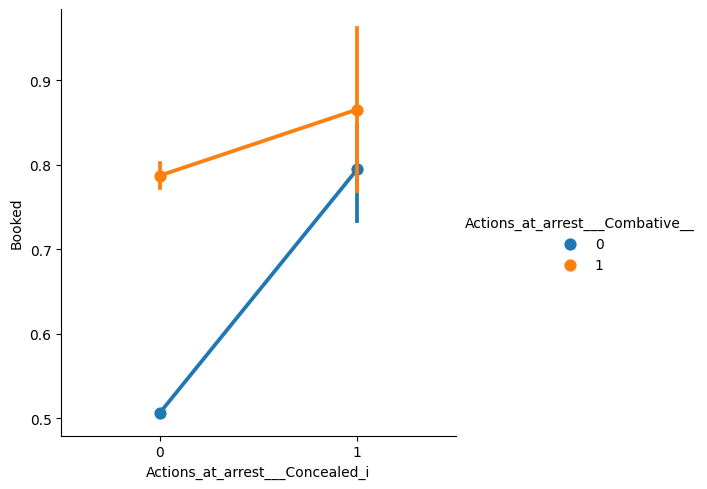

In [2003]:
sns.catplot(x="Actions_at_arrest___Concealed_i", y="Booked", hue="Actions_at_arrest___Combative__", data=dataG, kind="point")
plt.show()

In [2004]:
#anova

model_01 = ols('Booked ~ Actions_at_arrest___Resisted__d+ Actions_at_arrest___Assaulted_o+ Actions_at_arrest___Resisted__d: Actions_at_arrest___Assaulted_o', data=dataG).fit()

In [2005]:
#anova
anova_table_01 = sm.stats.anova_lm(model_01, typ=2)
print(anova_table_01)

                                                          sum_sq       df  \
Actions_at_arrest___Resisted__d                        58.339675      1.0   
Actions_at_arrest___Assaulted_o                        30.421087      1.0   
Actions_at_arrest___Resisted__d:Actions_at_arre...      1.529269      1.0   
Residual                                            16194.320217  65272.0   

                                                             F        PR(>F)  
Actions_at_arrest___Resisted__d                     235.140915  5.581848e-53  
Actions_at_arrest___Assaulted_o                     122.613678  1.796216e-28  
Actions_at_arrest___Resisted__d:Actions_at_arre...    6.163795  1.304161e-02  
Residual                                                   NaN           NaN  


In [2006]:
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Resisted__d'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Assaulted_o'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.168   0.0 0.1481 0.1879   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.3114   0.0 0.2632 0.3596   True
-------------------------------------------------


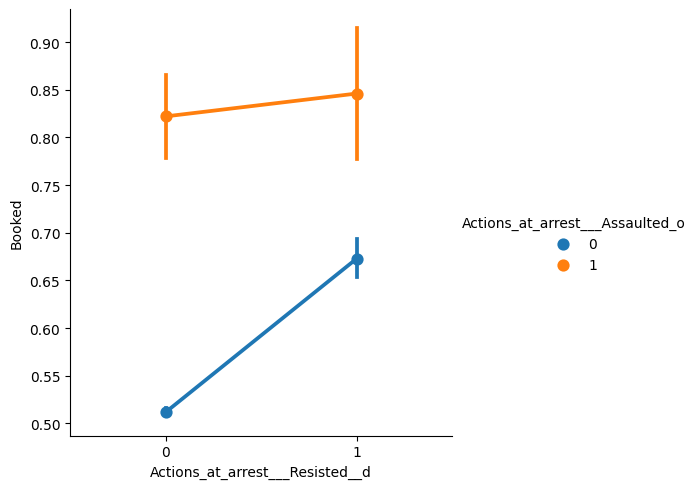

In [2007]:
sns.catplot(x="Actions_at_arrest___Resisted__d", y="Booked", hue="Actions_at_arrest___Assaulted_o", data=dataG, kind="point")
plt.show()

In [2008]:
#anova
model_02 = ols('Booked~ Sex+ Perceived_Race+ Sex: Perceived_Race', data=dataG).fit()

In [2009]:
#anova
anova_table_02 = sm.stats.anova_lm(model_02, typ=2)
print(anova_table_02)

                          sum_sq       df           F         PR(>F)
Sex                   226.794188      2.0  458.966628  1.807776e-101
Perceived_Race         69.734564      8.0   35.280708   1.747468e-29
Sex:Perceived_Race     21.966070     16.0    5.556631   2.496561e-08
Residual            16122.582625  65255.0         NaN            NaN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [2010]:
mc = MultiComparison(dataG['Booked'], dataG['Sex'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['Booked'], dataG['Perceived_Race'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1044    0.0  -0.116 -0.0929   True
     1      3  -0.3175  0.135 -0.7065  0.0715  False
     2      3  -0.2131 0.4046 -0.6022  0.1761  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0375    0.0  0.0226  0.0524   True
     1      3  -0.0225 0.2065 -0.0499  0.0048  False
     1      4    0.041 0.0143  0.0045  0.0774   True
     1      5  -0.0102 0.9743  -0.039  0.0185  False
     1      6  -0.0324 0.0007  -0.056 -0.0087   True
     1      7   0.0314 0.1999 -0.0065  0.0694  False
     1      8  -0.0401    0.0 -0.0652  -0.015   True
     1      9  -0.5144    0.5 -1.2883  0.2596  False
     2      3    -0.06    0.0 -0.0883 -0.0318 

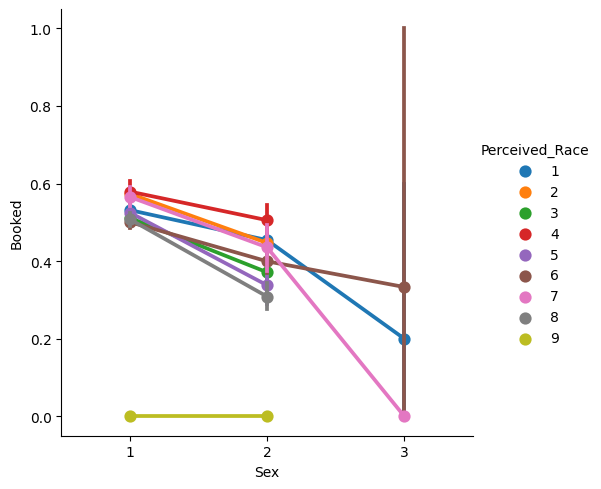

In [2011]:
sns.catplot(x="Sex", y="Booked", hue="Perceived_Race", data=dataG, kind="point")
plt.show()

In [2012]:
#anova
model_03 = ols('Booked ~ Sex+ PersonID+ Sex: PersonID', data=dataG).fit()

In [2013]:
#anova
anova_table_03 = sm.stats.anova_lm(model_03, typ=2)
print(anova_table_03)

                    sum_sq       df           F        PR(>F)
Sex             111.810375      2.0  225.494016  2.546672e-98
PersonID          0.140856      1.0    0.568144  4.509999e-01
Sex:PersonID      0.257584      2.0    0.519483  5.948303e-01
Residual      16181.944188  65270.0         NaN           NaN


In [2014]:
#anova
model_04 = ols('StripSearch ~ Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__+ Actions_at_arrest___Concealed_i:Actions_at_arrest___Combative__', data=dataG).fit()
anova_table_04 = sm.stats.anova_lm(model_04, typ=2)
print(anova_table_04)

                                                         sum_sq       df  \
Actions_at_arrest___Concealed_i                       22.675936      1.0   
Actions_at_arrest___Combative__                       36.158425      1.0   
Actions_at_arrest___Concealed_i:Actions_at_arre...     0.898695      1.0   
Residual                                            6806.149128  65272.0   

                                                             F        PR(>F)  
Actions_at_arrest___Concealed_i                     217.465654  3.876273e-49  
Actions_at_arrest___Combative__                     346.764767  3.405080e-77  
Actions_at_arrest___Concealed_i:Actions_at_arre...    8.618619  3.328600e-03  
Residual                                                   NaN           NaN  


In [2015]:
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Concealed_i'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Combative__'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.3103   0.0 0.2713 0.3493   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.119   0.0 0.1069 0.1311   True
-------------------------------------------------


<Figure size 500x500 with 0 Axes>

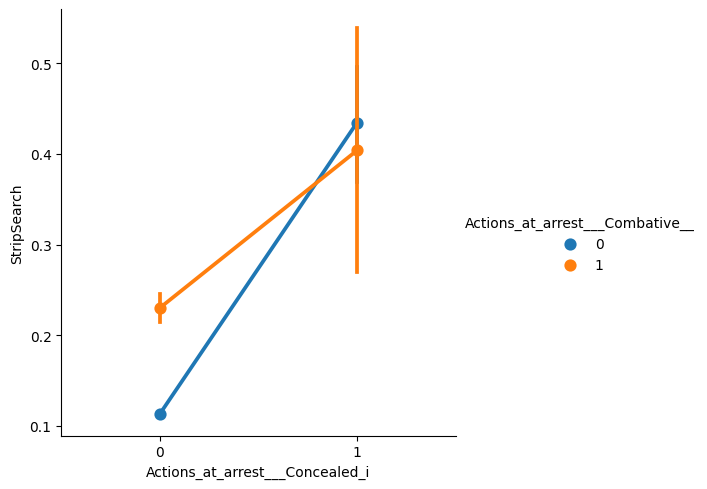

In [2016]:
# create interaction plot
plt.figure(figsize=(5,5))
sns.catplot(x="Actions_at_arrest___Concealed_i", y="StripSearch", hue="Actions_at_arrest___Combative__", data=dataG, kind="point")
plt.show()

In [2017]:
#anova
model_05 = ols('StripSearch ~ Actions_at_arrest___Resisted__d+ Actions_at_arrest___Assaulted_o+ Actions_at_arrest___Resisted__d: Actions_at_arrest___Assaulted_o', data=dataG).fit()
anova_table_05 = sm.stats.anova_lm(model_05, typ=2)
print(anova_table_05)

                                                         sum_sq       df  \
Actions_at_arrest___Resisted__d                       13.295906      1.0   
Actions_at_arrest___Assaulted_o                        6.959871      1.0   
Actions_at_arrest___Resisted__d:Actions_at_arre...     0.030479      1.0   
Residual                                            6846.248593  65272.0   

                                                             F        PR(>F)  
Actions_at_arrest___Resisted__d                     126.762904  2.228344e-29  
Actions_at_arrest___Assaulted_o                      66.355275  3.831428e-16  
Actions_at_arrest___Resisted__d:Actions_at_arre...    0.290587  5.898462e-01  
Residual                                                   NaN           NaN  


In [2018]:
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Assaulted_o'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Assaulted_o'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.1489   0.0 0.1176 0.1802   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.1489   0.0 0.1176 0.1802   True
-------------------------------------------------


<Figure size 500x500 with 0 Axes>

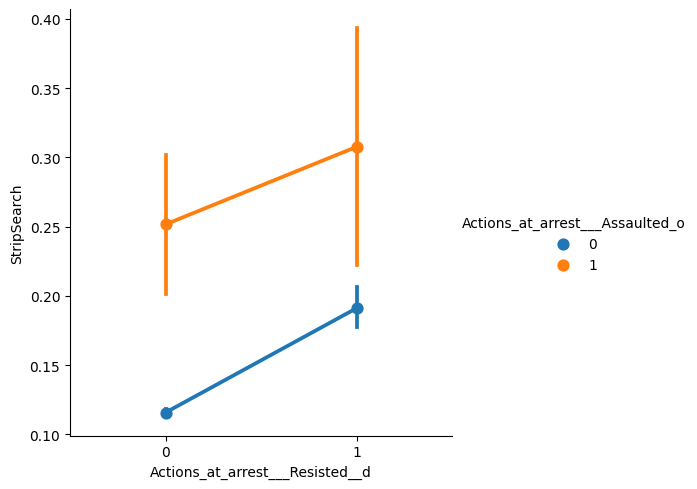

In [2019]:
plt.figure(figsize=(5,5))
sns.catplot(x="Actions_at_arrest___Resisted__d", y="StripSearch", hue="Actions_at_arrest___Assaulted_o", data=dataG, kind="point")
plt.show()

In [2020]:
#anova
model_06 = ols('StripSearch ~  Sex+ Perceived_Race+ Sex: Perceived_Race', data=dataG).fit()
anova_table_06 = sm.stats.anova_lm(model_06, typ=2)
print(anova_table_06)

                         sum_sq       df          F        PR(>F)
Sex                   13.986577      2.0  66.979249  2.792757e-16
Perceived_Race        45.443662      8.0  54.405421  7.275917e-46
Sex:Perceived_Race    12.577049     16.0   7.528659  4.257606e-12
Residual            6813.259837  65255.0        NaN           NaN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [2021]:
mc = MultiComparison(dataG['StripSearch'], dataG['Sex'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Perceived_Race'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0221    0.0 -0.0296 -0.0146   True
     1      3  -0.1238 0.4862 -0.3772  0.1296  False
     2      3  -0.1017 0.6147 -0.3551  0.1517  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0102 0.0285  0.0006  0.0199   True
     1      3  -0.0575    0.0 -0.0752 -0.0398   True
     1      4   0.0296 0.0032   0.006  0.0532   True
     1      5  -0.0582    0.0 -0.0768 -0.0396   True
     1      6  -0.0226 0.0002  -0.038 -0.0073   True
     1      7   -0.054    0.0 -0.0786 -0.0294   True
     1      8  -0.0514    0.0 -0.0677 -0.0351   True
     1      9   0.1214  0.998 -0.3803  0.6231  False
     2      3  -0.0677    0.0 -0.0861 -0.0494 

<Figure size 500x500 with 0 Axes>

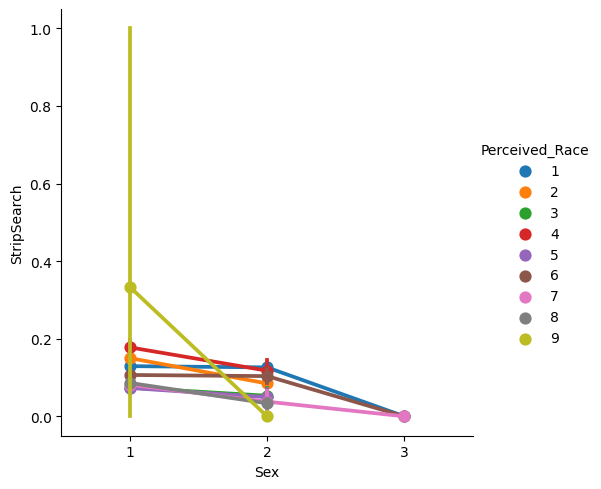

In [2022]:
plt.figure(figsize=(5,5))
sns.catplot(x="Sex", y="StripSearch", hue="Perceived_Race", data=dataG, kind="point")
plt.show()

In [2023]:
#anova
model_07 = ols('StripSearch ~  Sex+ Booked+ Sex: Booked', data=dataG).fit()
anova_table_07 = sm.stats.anova_lm(model_07, typ=2)
print(anova_table_07)

                 sum_sq       df            F    PR(>F)
Sex            0.065511      2.0     0.342124  0.710261
Booked       614.158206      1.0  6414.771014  0.000000
Sex:Booked     0.424610      2.0     2.217486  0.108891
Residual    6249.031492  65270.0          NaN       NaN


In [2024]:
mc = MultiComparison(dataG['StripSearch'], dataG['Sex'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Booked'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0221    0.0 -0.0296 -0.0146   True
     1      3  -0.1238 0.4862 -0.3772  0.1296  False
     2      3  -0.1017 0.6147 -0.3551  0.1517  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.1949   0.0 0.1902 0.1997   True
-------------------------------------------------


<Figure size 500x500 with 0 Axes>

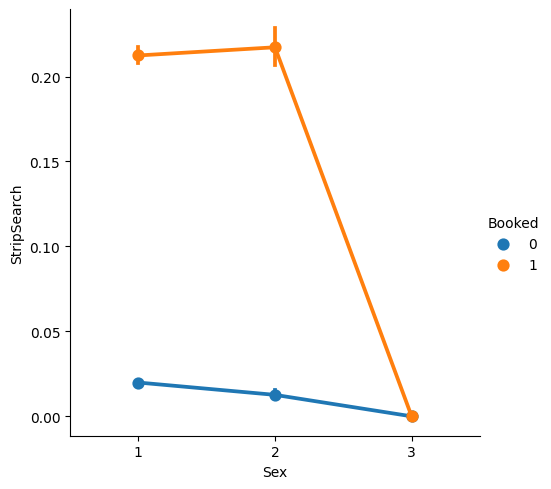

In [2025]:
plt.figure(figsize=(5,5))
sns.catplot(x="Sex", y="StripSearch", hue="Booked", data=dataG, kind="point")
plt.show()

In [2026]:
# two sample t test Based on two Y
group_a=dataG[dataG['Booked'] == 0]['StripSearch']
group_b=dataG[dataG['Booked']== 1]['StripSearch']
t_stat, p_val = ttest_ind(group_a, group_b)
print(t_stat)
print(p_val)
group_a=dataG[dataG['StripSearch'] == 0]['Booked']
group_b=dataG[dataG['StripSearch']== 1]['Booked']
t_stat, p_val = ttest_ind(group_a, group_b)
print(t_stat)
print(p_val)

-80.41945804370819
0.0
-80.4194580437082
0.0


In [2027]:
#two sample t test
group3_1=dataG[dataG['Actions_at_arrest___Assaulted_o'] == 0]['StripSearch']
group4_1=dataG[dataG['Actions_at_arrest___Assaulted_o']== 1]['StripSearch']
t_stat, p_val = ttest_ind(group3_1, group4_1)
print(t_stat)
print(p_val)

-9.327828091770368
1.1131249410887672e-20


In [2028]:
#two sample t test
group7=dataG[dataG['Actions_at_arrest___Combative__'] == 0]['StripSearch']
group8=dataG[dataG['Actions_at_arrest___Combative__']== 1]['StripSearch']

In [2029]:
#two sample t test
t_stat, p_val = ttest_ind(group7, group8)
print(t_stat)
print(p_val)

-19.305101902877688
8.290039188934905e-83


In [2030]:
#two sample t test
group9=dataG[dataG['Actions_at_arrest___Resisted__d'] == 0]['StripSearch']
group10=dataG[dataG['Actions_at_arrest___Resisted__d']== 1]['StripSearch']

In [2031]:
#two sample t test
t_stat, p_val = ttest_ind(group9, group10)
print(t_stat)
print(p_val)

-12.14235071240765
6.852716690955235e-34


In [2032]:
#two sample t test
group11=dataG[dataG['Actions_at_arrest___Concealed_i'] == 0]['StripSearch']
group12=dataG[dataG['Actions_at_arrest___Concealed_i']== 1]['StripSearch']

In [2033]:
#two sample t test
t_stat, p_val = ttest_ind(group11, group12)
print(t_stat)
print(p_val)

-15.599673537099743
9.191399072028645e-55


In [2034]:
group11=dataG[dataG['Actions_at_arrest___Concealed_i'] == 0]['StripSearch']
group12=dataG[dataG['Actions_at_arrest___Concealed_i']== 1]['StripSearch']

In [2035]:
#two sample t test
group11_1=dataG[dataG['Sex'] == 1]['StripSearch']
group12_1=dataG[dataG['Sex']== 2]['StripSearch']
group12_1_1 = dataG[dataG['Sex']== 3]['StripSearch']

In [2036]:
#two sample t test
t_stat, p_val = ttest_ind(group11_1, group12_1)
print(t_stat)
print(p_val)

6.878475003915285
6.1039305439141965e-12


In [2037]:
#two sample t test
t_stat, p_val = ttest_ind(group11_1, group12_1_1)
print(t_stat)
print(p_val)

1.1276362889725497
0.2594786924739137


In [2038]:
#two sample t test
t_stat, p_val = ttest_ind(group12_1, group12_1_1)
print(t_stat)
print(p_val)

1.0092728233762753
0.3128631539314948


In [2039]:
#two sample t test
group13_1=dataG[dataG['Perceived_Race'] == 1]['StripSearch']
group14_1=dataG[dataG['Perceived_Race']== 2]['StripSearch']
group15_1 = dataG[dataG['Perceived_Race']== 3]['StripSearch']
group16_1=dataG[dataG['Perceived_Race'] == 4]['StripSearch']
group17_1=dataG[dataG['Perceived_Race']== 5]['StripSearch']
group18_1 = dataG[dataG['Perceived_Race']== 6]['StripSearch']
group19_1=dataG[dataG['Perceived_Race'] == 7]['StripSearch']
group20_1=dataG[dataG['Perceived_Race']== 8]['StripSearch']
group21_1 = dataG[dataG['Perceived_Race']== 9]['StripSearch']

In [2040]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group14_1)
print(t_stat)
print(p_val)

-3.1320279316335236
0.0017371398920229028


In [2041]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group15_1)
print(t_stat)
print(p_val)

9.94776630106247
2.792578423891952e-23


In [2042]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group16_1)
print(t_stat)
print(p_val)

-3.7352297553793568
0.00018789499535262148


In [2043]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group17_1)
print(t_stat)
print(p_val)

9.568334579415962
1.164052970432168e-21


In [2044]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group18_1)
print(t_stat)
print(p_val)

4.471064581752621
7.809206380978744e-06


In [2045]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group19_1)
print(t_stat)
print(p_val)

6.648546378845182
3.011640952965667e-11


In [2046]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group20_1)
print(t_stat)
print(p_val)

9.719358295257091
2.676274994949316e-22


In [2047]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group21_1)
print(t_stat)
print(p_val)

-0.7249408268651991
0.4684944509111302


In [2048]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group15_1)
print(t_stat)
print(p_val)

11.156626344607513
8.000948132483773e-29


In [2049]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group15_1)
print(t_stat)
print(p_val)

11.156626344607513
8.000948132483773e-29


In [2050]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group15_1)
print(t_stat)
print(p_val)

11.156626344607513
8.000948132483773e-29


In [2051]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group16_1)
print(t_stat)
print(p_val)

-2.3210532306546816
0.020294250888617093


In [2052]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group17_1)
print(t_stat)
print(p_val)

10.730417450270894
8.613258773630027e-27


In [2053]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group18_1)
print(t_stat)
print(p_val)

6.096509484431073
1.101680686001579e-09


In [2054]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group19_1)
print(t_stat)
print(p_val)

7.589795404268061
3.3495626456279174e-14


In [2055]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group20_1)
print(t_stat)
print(p_val)

11.043411381820977
2.8007137752123774e-28


In [2056]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group21_1)
print(t_stat)
print(p_val)

-0.6424973091543034
0.5205587393372844


In [2057]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group17_1)
print(t_stat)
print(p_val)

0.1121754859796021
0.9106875536218013


In [2058]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group18_1)
print(t_stat)
print(p_val)

-5.563408370070555
2.7242942377107306e-08


In [2059]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group19_1)
print(t_stat)
print(p_val)

-0.46938194227480823
0.6388156784157535


In [2060]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group20_1)
print(t_stat)
print(p_val)

-1.0363230295666503
0.3000826873108573


In [2061]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group21_1)
print(t_stat)
print(p_val)

-1.3891583495727888
0.16487016642859878


In [2062]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group17_1)
print(t_stat)
print(p_val)

10.13468102741156
6.477083626527833e-24


In [2063]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group18_1)
print(t_stat)
print(p_val)

6.013794549048321
1.90366643139874e-09


In [2064]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group19_1)
print(t_stat)
print(p_val)

7.927148680949881
2.9438361891035878e-15


In [2065]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group20_1)
print(t_stat)
print(p_val)

9.890905905296504
6.67138355065641e-23


In [2066]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group21_1)
print(t_stat)
print(p_val)

-0.501978235445013
0.6157399136662366


In [2067]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group18_1)
print(t_stat)
print(p_val)

-5.474148960343573
4.524606687296821e-08


In [2068]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group18_1)
print(t_stat)
print(p_val)

-5.474148960343573
4.524606687296821e-08


In [2069]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group19_1)
print(t_stat)
print(p_val)

-0.5528766203622035
0.5803725991559479


In [2070]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group20_1)
print(t_stat)
print(p_val)

-1.1202571908383183
0.2626393470842512


In [2071]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group21_1)
print(t_stat)
print(p_val)

-1.4005974603788052
0.1614302697743403


In [2072]:
#two sample t test
t_stat, p_val = ttest_ind(group18_1, group19_1)
print(t_stat)
print(p_val)

3.8220208671406146
0.000133539748082092


In [2073]:
#two sample t test
t_stat, p_val = ttest_ind(group18_1, group20_1)
print(t_stat)
print(p_val)

4.824880617462717
1.42274405653771e-06


In [2074]:
#two sample t test
t_stat, p_val = ttest_ind(group18_1, group21_1)
print(t_stat)
print(p_val)

-0.9345107624297677
0.35008509755433304


In [2075]:
#two sample t test
t_stat, p_val = ttest_ind(group19_1, group20_1)
print(t_stat)
print(p_val)

-0.34430815112964314
0.7306262680001844


In [2076]:
#two sample t test
t_stat, p_val = ttest_ind(group19_1, group21_1)
print(t_stat)
print(p_val)

-1.3293476935480995
0.18390459585257707


In [2077]:
#two sample t test
t_stat, p_val = ttest_ind(group20_1, group21_1)
print(t_stat)
print(p_val)

-1.2924366136132381
0.19627359067486672


In [2078]:
searched = dataG[dataG.StripSearch == 1]
not_searched = dataG[dataG.StripSearch == 0]

# Calculate the T-test statistic and p-value
t_stat, p_value = ttest_ind(searched.Arrest_Year, not_searched.Arrest_Year)

# Print the results
print("T-test statistic:", t_stat)
print("p-value:", p_value)

T-test statistic: -83.63857537298534
p-value: 0.0


In [2079]:
#two sample t test Y(Booked)
group3=dataG[dataG['Actions_at_arrest___Assaulted_o'] == 0]['Booked']
group4=dataG[dataG['Actions_at_arrest___Assaulted_o']== 1]['Booked']

In [2080]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group3, group4)
print(t_stat)
print(p_val)

-12.671738748469823
9.371589445287678e-37


In [2081]:
#two sample t test Y(Booked)
group5=dataG[dataG['Actions_at_arrest___Combative__'] == 0]['Booked']
group6=dataG[dataG['Actions_at_arrest___Combative__']== 1]['Booked']

In [2082]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group5, group6)
print(t_stat)
print(p_val)

-29.770844823716786
1.850129586712657e-193


In [2083]:
#two sample t test Y(Booked)
group13=dataG[dataG['Actions_at_arrest___Resisted__d'] == 0]['Booked']
group14=dataG[dataG['Actions_at_arrest___Resisted__d']== 1]['Booked']

In [2084]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group13, group14)
print(t_stat)
print(p_val)

-16.52750274397805
3.0991861258939068e-61


In [2085]:
#two sample t test Y(Booked)
group15=dataG[dataG['Actions_at_arrest___Concealed_i'] == 0]['Booked']
group16=dataG[dataG['Actions_at_arrest___Concealed_i']== 1]['Booked']

In [2086]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group15, group16)
print(t_stat)
print(p_val)

-9.452111206830326
3.4259626944345515e-21


In [2087]:
#two sample t test Y(Booked)
group00=dataG[dataG['Sex'] == 1]['Booked']
group01=dataG[dataG['Sex']== 2]['Booked']
group011=dataG[dataG['Sex']== 3]['Booked']

In [2088]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group00, group01)
print(t_stat)
print(p_val)

21.162765512640036
4.538508262103051e-99


In [2089]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group00, group011)
print(t_stat)
print(p_val)

1.910965386572675
0.05601445324387898


In [2090]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group01, group011)
print(t_stat)
print(p_val)

1.2887997331934078
0.19749133570007932


In [2091]:
#two sample t test Y(Booked)
group02=dataG[dataG['Perceived_Race'] == 1]['Booked']
group021=dataG[dataG['Perceived_Race'] == 2]['Booked']
group022=dataG[dataG['Perceived_Race']== 3]['Booked']
group023=dataG[dataG['Perceived_Race']== 4]['Booked']
group024=dataG[dataG['Perceived_Race'] == 5]['Booked']
group025=dataG[dataG['Perceived_Race'] == 6]['Booked']
group026=dataG[dataG['Perceived_Race']== 7]['Booked']
group027=dataG[dataG['Perceived_Race']== 8]['Booked']
group028=dataG[dataG['Perceived_Race']== 9]['Booked']

In [2092]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group021)
print(t_stat)
print(p_val)

-7.788019577371173
6.951030021698397e-15


In [2093]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group022)
print(t_stat)
print(p_val)

2.5494970132240486
0.010792563830820456


In [2094]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group023)
print(t_stat)
print(p_val)

-3.4850602831343185
0.0004927367034872853


In [2095]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group024)
print(t_stat)
print(p_val)

1.0990868214560117
0.2717387447450093


In [2096]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group025)
print(t_stat)
print(p_val)

4.235625914893822
2.28537271217795e-05


In [2097]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group026)
print(t_stat)
print(p_val)

-2.5650411037362275
0.010321259335597747


In [2098]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group027)
print(t_stat)
print(p_val)

4.949683709803972
7.470993769703034e-07


In [2099]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group028)
print(t_stat)
print(p_val)

2.058273922414629
0.03957317036953425


In [2100]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group022)
print(t_stat)
print(p_val)

6.6004315577956385
4.196844538054726e-11


In [2101]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group023)
print(t_stat)
print(p_val)

-0.2903737483768435
0.771533419152739


In [2102]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group024)
print(t_stat)
print(p_val)

5.008824004961661
5.521276587492995e-07


In [2103]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group025)
print(t_stat)
print(p_val)

8.790505710107919
1.5931037488419893e-18


In [2104]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group026)
print(t_stat)
print(p_val)

0.4875628973492579
0.6258650216643303


In [2105]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group027)
print(t_stat)
print(p_val)

9.255369771114172
2.325091278847172e-20


In [2106]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group028)
print(t_stat)
print(p_val)

2.219309720492586
0.026478412913132524


In [2107]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group023)
print(t_stat)
print(p_val)

-4.516082227181783
6.4299646895485576e-06


In [2108]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group024)
print(t_stat)
print(p_val)

-1.0193437277909694
0.30807582103929887


In [2109]:
#two sample t test Y(Booked)

t_stat, p_val = ttest_ind(group022, group025)
print(t_stat)
print(p_val)

0.9030826216602109
0.36650714462932366


In [2110]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group026)
print(t_stat)
print(p_val)

-3.7244323776304684
0.00019775938798261892


In [2111]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group027)
print(t_stat)
print(p_val)

1.5649981487583946
0.1176227678406107


In [2112]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group028)
print(t_stat)
print(p_val)

1.9670584619981006
0.049252836090108165


In [2113]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group024)
print(t_stat)
print(p_val)

3.5674216120509032
0.0003637780619846632


In [2114]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group025)
print(t_stat)
print(p_val)

5.4960331883620945
4.021353708654978e-08


In [2115]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group026)
print(t_stat)
print(p_val)

0.5809968992849005
0.5612779304606101


In [2116]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group027)
print(t_stat)
print(p_val)

5.959089189131313
2.6725113144037803e-09


In [2117]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group028)
print(t_stat)
print(p_val)

2.2338741411392387
0.025605153064544958


In [2118]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group025)
print(t_stat)
print(p_val)

1.9702404453895033
0.04884404525376284


In [2119]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group026)
print(t_stat)
print(p_val)

-2.820073003575823
0.004820167705549002


In [2120]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group027)
print(t_stat)
print(p_val)

2.5841446419283285
0.009780444522640045


In [2121]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group028)
print(t_stat)
print(p_val)

2.0161299118905043
0.04386879944083689


In [2122]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group025, group026)
print(t_stat)
print(p_val)

-4.625746766931675
3.801379914986045e-06


In [2123]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group025, group027)
print(t_stat)
print(p_val)

0.7491929737528114
0.45375951409859716


In [2124]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group025, group028)
print(t_stat)
print(p_val)

1.928875359125041
0.053802225301529144


In [2125]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group026, group027)
print(t_stat)
print(p_val)

5.0926198567391205
3.63610310131711e-07


In [2126]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group026, group028)
print(t_stat)
print(p_val)

2.19124356694684
0.028564113899939448


In [2127]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group027, group028)
print(t_stat)
print(p_val)

1.8992514338766815
0.05759651436090147


In [2128]:
#Two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group027, group028)
print(t_stat)
print(p_val)

1.8992514338766815
0.05759651436090147


In [2129]:
booked = dataG[dataG.Booked == 1]
not_booked = dataG[dataG.Booked == 0]

# Calculate the T-test statistic and p-value
t_stat, p_value = ttest_ind(booked.Arrest_Year, not_booked.Arrest_Year)

# Print the results
print("T-test statistic:", t_stat)
print("p-value:", p_value)

T-test statistic: -7.57007223692529
p-value: 3.778997826129604e-14


In [2130]:
#EXAM     2178

In [2131]:
#Power

In [2132]:
from statsmodels.stats.power import FTestAnovaPower

# select relevant variables
x1 = dataG['Actions_at_arrest___Concealed_i']
x2 = dataG['Actions_at_arrest___Combative__']
y = dataG['StripSearch']

# calculate means and standard deviations
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
mean_y = np.mean(y)
std_x1 = np.std(x1, ddof=1)
std_x2 = np.std(x2, ddof=1)
std_y = np.std(y, ddof=1)

# calculate effect size (Cohen's d)
d1 = (mean_x1 - mean_y) / std_y
d2 = (mean_x2 - mean_y) / std_y

# print the effect sizes
print("Effect size for Actions_at_arrest___Concealed_i: ", d1)
print("Effect size for Actions_at_arrest___Combative__: ", d2)

Effect size for Actions_at_arrest___Concealed_i:  -0.3558486324162262
Effect size for Actions_at_arrest___Combative__:  -0.23235239170376018


In [2133]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Combative__", "StripSearch"]).size()

# Print the actual sample size for each group
print("Actual sample size for StripSearch and Actions_at_arrest___Combative__:")
print(sample_sizes)

Actual sample size for StripSearch and Actions_at_arrest___Combative__:
Actions_at_arrest___Combative__  StripSearch
0                                0              55266
                                 1               7129
1                                0               2209
                                 1                672
dtype: int64


In [2134]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Concealed_i", "StripSearch"]).size()

# Print the actual sample size for each group
print("Actual sample size for StripSearch and Actions_at_arrest___Concealed_i:")
print(sample_sizes)

Actual sample size for StripSearch and Actions_at_arrest___Concealed_i:
Actions_at_arrest___Concealed_i  StripSearch
0                                0              57323
                                 1               7687
1                                0                152
                                 1                114
dtype: int64


In [2135]:
from statsmodels.stats.power import TTestIndPower

# specify power and alpha levels
power = 0.8
alpha = 0.05

# calculate sample size using two-sample t-test assuming equal variances
nobs_1 = TTestIndPower().solve_power(effect_size=np.abs(d1), alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Sample size for Actions_at_arrest___Concealed_i is:", round(nobs_1))
nobs_2 = TTestIndPower().solve_power(effect_size=np.abs(d2), alpha=alpha, power=power, ratio=1, alternative='two-sided')
print("Sample size for Actions_at_arrest___Combative__ is:", round(nobs_2))

Sample size for Actions_at_arrest___Concealed_i is: 125
Sample size for Actions_at_arrest___Combative__ is: 292


In [2136]:
# perform power analysis using two-sample t-test assuming equal variances
tt = TTestIndPower()
power_analysis = tt.solve_power(effect_size=np.abs(d1), nobs1=nobs_1, alpha=alpha, power=None, ratio=nobs_2/nobs_1)
print("The power for the independent variable Actions_at_arrest___Concealed_i is:", round(power_analysis, 2))

power_analysis = tt.solve_power(effect_size=np.abs(d2), nobs1=nobs_1, alpha=alpha, power=None, ratio=nobs_2/nobs_1)
print("The power for the independent variable Actions_at_arrest___Combative__ is:", round(power_analysis, 2))

The power for the independent variable Actions_at_arrest___Concealed_i is: 0.91
The power for the independent variable Actions_at_arrest___Combative__ is: 0.58


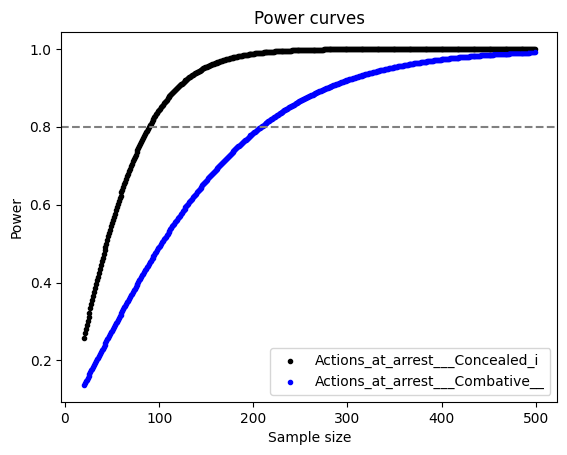

In [2137]:
# create a range of sample sizes to test
sample_sizes = range(20, 500)

# perform power analysis for each sample size and plot the results
tt = TTestIndPower()
fig, ax = plt.subplots()
for i, n1 in enumerate(sample_sizes):
    n2 = int(n1 * (292/125)) # keep the ratio of n2/n1 constant
    power1 = tt.solve_power(effect_size=np.abs(d1), nobs1=n1, alpha=alpha, power=None, ratio=n2/n1)
    power2 = tt.solve_power(effect_size=np.abs(d2), nobs1=n1, alpha=alpha, power=None, ratio=n2/n1)
    ax.scatter(n1, power1, color='black', marker='.')
    ax.scatter(n1, power2, color='blue', marker='.')
    
ax.axhline(power, color='gray', linestyle='--', label='Desired power')
ax.set_xlabel('Sample size')
ax.set_ylabel('Power')
ax.set_title('Power curves')
ax.legend(['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__'])
plt.show()

In [2138]:
# select relevant variables
x3 = dataG['Actions_at_arrest___Resisted__d']
x4 = dataG['Actions_at_arrest___Assaulted_o']
y = dataG['StripSearch']

# calculate means and standard deviations
mean_x3 = np.mean(x3)
mean_x4 = np.mean(x4)
mean_y = np.mean(y)
std_x3 = np.std(x3, ddof=1)
std_x4 = np.std(x4, ddof=1)
std_y = np.std(y, ddof=1)

# calculate effect size (Cohen's d)
d3 = (mean_x3 - mean_y) / std_y
d4 = (mean_x4 - mean_y) / std_y

# print the effect sizes
print("Effect size for Actions_at_arrest___Resisted__d: ", d3)
print("Effect size for Actions_at_arrest___Assaulted_o: ", d4)

Effect size for Actions_at_arrest___Resisted__d:  -0.2502510820402897
Effect size for Actions_at_arrest___Assaulted_o:  -0.3488119441308888


In [2139]:
# specify power and alpha levels
power = 0.8
alpha = 0.05

# calculate sample size using two-sample t-test assuming equal variances
nobs_3 = TTestIndPower().solve_power(effect_size=np.abs(d3), alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Sample size for Actions_at_arrest___Resisted__d is:", round(nobs_3))
nobs_4 = TTestIndPower().solve_power(effect_size=np.abs(d4), alpha=alpha, power=power, ratio=1, alternative='two-sided')
print("Sample size for Actions_at_arrest___Assaulted_o is:", round(nobs_4))

Sample size for Actions_at_arrest___Resisted__d is: 252
Sample size for Actions_at_arrest___Assaulted_o is: 130


In [2140]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Resisted__d", "StripSearch"]).size()

# Print the actual sample size for each group
print("Actual sample size for StripSearch and Actions_at_arrest___Resisted__d:")
print(sample_sizes)

Actual sample size for StripSearch and Actions_at_arrest___Resisted__d:
Actions_at_arrest___Resisted__d  StripSearch
0                                0              55465
                                 1               7309
1                                0               2010
                                 1                492
dtype: int64


In [2141]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Assaulted_o", "StripSearch"]).size()

# Print the actual sample size for each group
print("Actual sample size for StripSearch and Actions_at_arrest___Resisted__d:")
print(sample_sizes)

Actual sample size for StripSearch and Actions_at_arrest___Resisted__d:
Actions_at_arrest___Assaulted_o  StripSearch
0                                0              57171
                                 1               7690
1                                0                304
                                 1                111
dtype: int64


In [2142]:
tt = TTestIndPower()
power_analysis = tt.solve_power(effect_size=np.abs(d3), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
print("The power for the independent variable Actions_at_arrest___Resisted__d is:", round(power_analysis, 2))

power_analysis = tt.solve_power(effect_size=np.abs(d4), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
print("The power for the independent variable Actions_at_arrest___Assaulted_o is:", round(power_analysis, 2))

The power for the independent variable Actions_at_arrest___Resisted__d is: 0.64
The power for the independent variable Actions_at_arrest___Assaulted_o is: 0.9


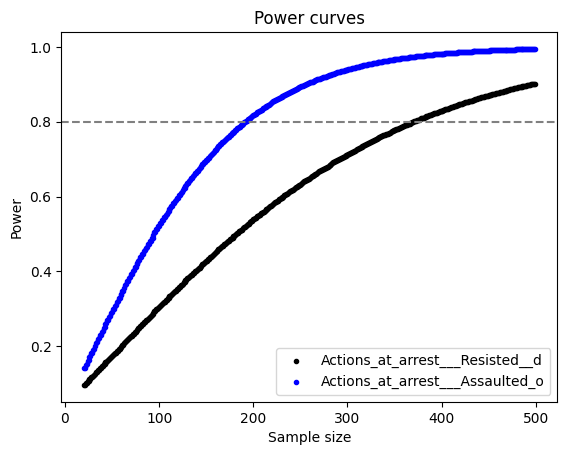

In [2143]:
# create a range of sample sizes to test
sample_sizes = range(20, 500)

# perform power analysis for each sample size and plot the results
tt = TTestIndPower()
fig, ax = plt.subplots()
for i, nobs_3 in enumerate(sample_sizes):
    nobs_4 = int(nobs_3 * (130/252)) # keep the ratio of n2/n1 constant
    power3 = tt.solve_power(effect_size=np.abs(d3), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
    power4 = tt.solve_power(effect_size=np.abs(d4), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
    ax.scatter(nobs_3, power3, color='black', marker='.')
    ax.scatter(nobs_3, power4, color='blue', marker='.')
    
ax.axhline(power, color='gray', linestyle='--', label='Desired power')
ax.set_xlabel('Sample size')
ax.set_ylabel('Power')
ax.set_title('Power curves')
ax.legend(['Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Assaulted_o'])
plt.show()

In [2144]:
x5 = dataG['Sex']
x6= dataG['Perceived_Race']
y = dataG['StripSearch']

# calculate means and standard deviations
mean_x5 = np.mean(x5)
mean_x6 = np.mean(x6)
mean_y = np.mean(y)
std_x5 = np.std(x5, ddof=1)
std_x6 = np.std(x6, ddof=1)
std_y = np.std(y, ddof=1)

# calculate effect size (Cohen's d)
d5 = (mean_x5 - mean_y) / std_y
d6 = (mean_x6 - mean_y) / std_y

# print the effect sizes
print("Effect size for Sex: ", d5)
print("Effect size for Perceived_Race: ", d6)

Effect size for Sex:  3.311021581778582
Effect size for Perceived_Race:  7.924633339974465


In [2145]:
# specify power and alpha levels
power = 0.8
alpha = 0.05



# calculate sample size using two-sample t-test assuming equal variances
nobs_5 = TTestIndPower().solve_power(effect_size=np.abs(d5), alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Sample size for Sex is:", round(nobs_5))
nobs_6 = TTestIndPower().solve_power(effect_size=np.abs(d6), alpha=alpha, power=power, ratio=1, alternative='two-sided')
print("Sample size for Perceived_Race is:", (nobs_6))

Sample size for Sex is: 3
Sample size for Perceived_Race is: [10.]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/power.py:415: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


In [2146]:
search_00 = dataG[dataG.Sex == 1].StripSearch.value_counts()
search_01= dataG[dataG.Perceived_Race == 1].StripSearch.value_counts()

# Print the actual sample size for each group
print("Actual sample size for StripSearch when Sex is 1:")
print(search_00)
print("\nActual sample size for StripSearch when Perceived_Race is 1:")
print(search_01)

Actual sample size for StripSearch when Sex is 1:
0    46132
1     6518
Name: StripSearch, dtype: int64

Actual sample size for StripSearch when Perceived_Race is 1:
0    24157
1     3566
Name: StripSearch, dtype: int64


In [2147]:
sample_sizes = dataG.groupby(["Sex", "StripSearch"]).size()

# Print the actual sample size for each group
print("Actual sample size for StripSearch and Sex:")
print(sample_sizes)

Actual sample size for StripSearch and Sex:
Sex  StripSearch
1    0              46132
     1               6518
2    0              11334
     1               1283
3    0                  9
dtype: int64


In [2148]:
sample_sizes = dataG.groupby(["Perceived_Race", "StripSearch"]).size()

# Print the actual sample size for each group
print("Actual sample size for StripSearch and Perceived_Race:")
print(sample_sizes)

Actual sample size for StripSearch and Perceived_Race:
Perceived_Race  StripSearch
1               0              24157
                1               3566
2               0              15092
                1               2434
3               0               3356
                1                257
4               0               1628
                1                306
5               0               3009
                1                228
6               0               4520
                1                536
7               0               1636
                1                132
8               0               4074
                1                341
9               0                  3
                1                  1
dtype: int64


In [2149]:
tt = TTestIndPower()
power_analysis = tt.solve_power(effect_size=np.abs(d5), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
print("The power for the independent variable Sex is:", power_analysis)

power_analysis = tt.solve_power(effect_size=np.abs(d6), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
print("The power for the independent variable Perceived_Race is:", power_analysis)

The power for the independent variable Sex is: [0.99316587]
The power for the independent variable Perceived_Race is: [1.]


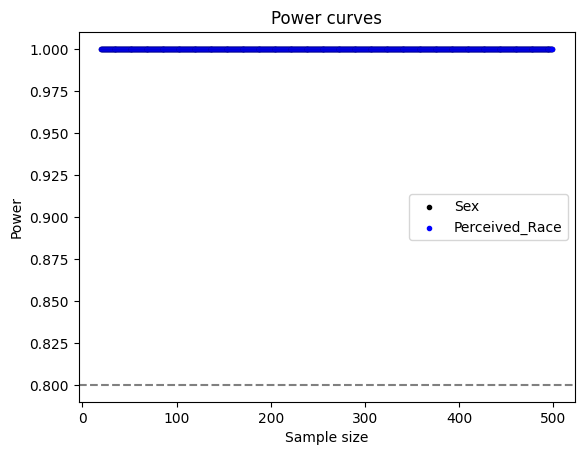

In [2150]:
# create a range of sample sizes to test
sample_sizes = range(20, 500)

# perform power analysis for each sample size and plot the results
tt = TTestIndPower()
fig, ax = plt.subplots()
for i, nobs_5 in enumerate(sample_sizes):
    nobs_6 = int(nobs_5 * (10/3)) # keep the ratio of n2/n1 constant
    power5 = tt.solve_power(effect_size=np.abs(d5), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
    power6 = tt.solve_power(effect_size=np.abs(d6), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
    ax.scatter(nobs_5, power5, color='black', marker='.')
    ax.scatter(nobs_5, power6, color='blue', marker='.')
    
ax.axhline(power, color='gray', linestyle='--', label='Desired power')
ax.set_xlabel('Sample size')
ax.set_ylabel('Power')
ax.set_title('Power curves')
ax.legend(['Sex', 'Perceived_Race'])
plt.show()

In [2151]:
# select relevant variables
x1 = dataG['Actions_at_arrest___Concealed_i']
x2 = dataG['Actions_at_arrest___Combative__']
y = dataG['Booked']

# calculate means and standard deviations
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
mean_y = np.mean(y)
std_x1 = np.std(x1, ddof=1)
std_x2 = np.std(x2, ddof=1)
std_y = np.std(y, ddof=1)

# calculate effect size (Cohen's d)
d1 = (mean_x1 - mean_y) / std_y
d2 = (mean_x2 - mean_y) / std_y

# print the effect sizes
print("Effect size for Actions_at_arrest___Concealed_i: ", d1)
print("Effect size for Actions_at_arrest___Combative__: ", d2)

Effect size for Actions_at_arrest___Concealed_i:  -1.031630709368055
Effect size for Actions_at_arrest___Combative__:  -0.9514489793933941


In [2152]:
# specify power and alpha levels
power = 0.8
alpha = 0.05

# calculate sample size using two-sample t-test assuming equal variances
nobs_1 = TTestIndPower().solve_power(effect_size=np.abs(d1), alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Sample size for Actions_at_arrest___Concealed_i is:", round(nobs_1))
nobs_2 = TTestIndPower().solve_power(effect_size=np.abs(d2), alpha=alpha, power=power, ratio=1, alternative='two-sided')
print("Sample size for Actions_at_arrest___Combative__ is:", round(nobs_2))

Sample size for Actions_at_arrest___Concealed_i is: 16
Sample size for Actions_at_arrest___Combative__ is: 18


In [2154]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Concealed_i", "Booked"]).size()

# Print the actual sample size for each group
print("Actual sample size for Booked and Actions_at_arrest___Concealed_i:")
print(sample_sizes)

Actual sample size for Booked and Actions_at_arrest___Concealed_i:
Actions_at_arrest___Concealed_i  Booked
0                                0         31314
                                 1         33696
1                                0            51
                                 1           215
dtype: int64


In [2155]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Combative__", "Booked"]).size()

# Print the actual sample size for each group
print("Actual sample size for Booked and Actions_at_arrest___Combative__:")
print(sample_sizes)

Actual sample size for Booked and Actions_at_arrest___Combative__:
Actions_at_arrest___Combative__  Booked
0                                0         30756
                                 1         31639
1                                0           609
                                 1          2272
dtype: int64


In [2156]:
tt = TTestIndPower()
power_analysis = tt.solve_power(effect_size=np.abs(d1), nobs1=nobs_1, alpha=alpha, power=None, ratio=nobs_2/nobs_1)
print("The power for the independent variable Actions_at_arrest___Concealed_i is:", round(power_analysis, 2))

power_analysis = tt.solve_power(effect_size=np.abs(d2), nobs1=nobs_1, alpha=alpha, power=None, ratio=nobs_2/nobs_1)
print("The power for the independent variable Actions_at_arrest___Combative__ is:", round(power_analysis, 2))

The power for the independent variable Actions_at_arrest___Concealed_i is: 0.83
The power for the independent variable Actions_at_arrest___Combative__ is: 0.77


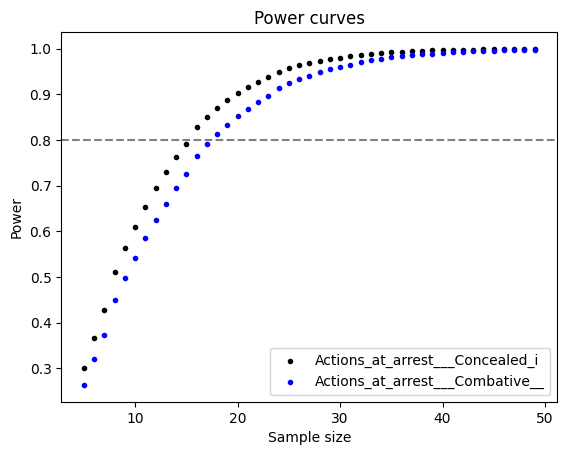

In [2157]:
# create a range of sample sizes to test
sample_sizes = range(5, 50)

# perform power analysis for each sample size and plot the results
tt = TTestIndPower()
fig, ax = plt.subplots()
for i, n1 in enumerate(sample_sizes):
    n2 = int(n1 * (18/16)) # keep the ratio of n2/n1 constant
    power1 = tt.solve_power(effect_size=np.abs(d1), nobs1=n1, alpha=alpha, power=None, ratio=n2/n1)
    power2 = tt.solve_power(effect_size=np.abs(d2), nobs1=n1, alpha=alpha, power=None, ratio=n2/n1)
    ax.scatter(n1, power1, color='black', marker='.')
    ax.scatter(n1, power2, color='blue', marker='.')
    
ax.axhline(power, color='gray', linestyle='--', label='Desired power')
ax.set_xlabel('Sample size')
ax.set_ylabel('Power')
ax.set_title('Power curves')
ax.legend(['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__'])
plt.show()

In [2158]:
# select relevant variables
x3 = dataG['Actions_at_arrest___Resisted__d']
x4 = dataG['Actions_at_arrest___Assaulted_o']
y = dataG['Booked']

# calculate means and standard deviations
mean_x3 = np.mean(x3)
mean_x4 = np.mean(x4)
mean_y = np.mean(y)
std_x3 = np.std(x3, ddof=1)
std_x4 = np.std(x4, ddof=1)
std_y = np.std(y, ddof=1)

# calculate effect size (Cohen's d)
d3 = (mean_x3 - mean_y) / std_y
d4 = (mean_x4 - mean_y) / std_y

# print the effect sizes
print("Effect size for Actions_at_arrest___Resisted__d: ", d3)
print("Effect size for Actions_at_arrest___Assaulted_o: ", d4)

Effect size for Actions_at_arrest___Resisted__d:  -0.9630699643495687
Effect size for Actions_at_arrest___Assaulted_o:  -1.0270620371821182


In [2159]:
# specify power and alpha levels
power = 0.8
alpha = 0.05

# calculate sample size using two-sample t-test assuming equal variances
nobs_3 = TTestIndPower().solve_power(effect_size=np.abs(d3), alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Sample size for Actions_at_arrest___Resisted__d is:", round(nobs_3))
nobs_4 = TTestIndPower().solve_power(effect_size=np.abs(d4), alpha=alpha, power=power, ratio=1, alternative='two-sided')
print("Sample size for Actions_at_arrest___Assaulted_o is:", round(nobs_4))

Sample size for Actions_at_arrest___Resisted__d is: 18
Sample size for Actions_at_arrest___Assaulted_o is: 16


In [2160]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Assaulted_o", "Booked"]).size()

# Print the actual sample size for each group
print("Actual sample size for Booked and Actions_at_arrest___Assaulted_o:")
print(sample_sizes)

Actual sample size for Booked and Actions_at_arrest___Assaulted_o:
Actions_at_arrest___Assaulted_o  Booked
0                                0         31294
                                 1         33567
1                                0            71
                                 1           344
dtype: int64


In [2161]:
sample_sizes = dataG.groupby(["Actions_at_arrest___Resisted__d", "Booked"]).size()

# Print the actual sample size for each group
print("Actual sample size for Booked and Actions_at_arrest___Resisted__d:")
print(sample_sizes)

Actual sample size for Booked and Actions_at_arrest___Resisted__d:
Actions_at_arrest___Resisted__d  Booked
0                                0         30567
                                 1         32207
1                                0           798
                                 1          1704
dtype: int64


In [2162]:
tt = TTestIndPower()
power_analysis = tt.solve_power(effect_size=np.abs(d3), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
print("The power for the independent variable Actions_at_arrest___Resisted__d is:", round(power_analysis, 2))

power_analysis = tt.solve_power(effect_size=np.abs(d4), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
print("The power for the independent variable Actions_at_arrest___Assaulted_o is:", round(power_analysis, 2))

The power for the independent variable Actions_at_arrest___Resisted__d is: 0.77
The power for the independent variable Actions_at_arrest___Assaulted_o is: 0.82


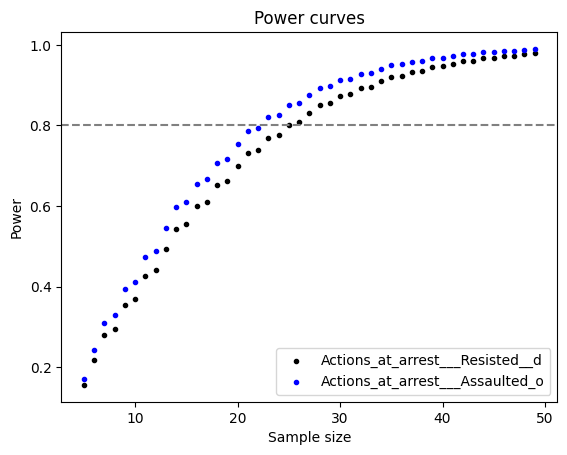

In [2163]:
# create a range of sample sizes to test
sample_sizes = range(5, 50)

# perform power analysis for each sample size and plot the results
tt = TTestIndPower()
fig, ax = plt.subplots()
for i, nobs_3 in enumerate(sample_sizes):
    nobs_4 = int(nobs_3 * (16/28)) # keep the ratio of n2/n1 constant
    power3 = tt.solve_power(effect_size=np.abs(d3), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
    power4 = tt.solve_power(effect_size=np.abs(d4), nobs1=nobs_3, alpha=alpha, power=None, ratio=nobs_4/nobs_3)
    ax.scatter(nobs_3, power3, color='black', marker='.')
    ax.scatter(nobs_3, power4, color='blue', marker='.')
    
ax.axhline(power, color='gray', linestyle='--', label='Desired power')
ax.set_xlabel('Sample size')
ax.set_ylabel('Power')
ax.set_title('Power curves')
ax.legend([ 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Assaulted_o'])
plt.show()

In [2164]:
x5 = dataG['Sex']
x6= dataG['Perceived_Race']
y = dataG['Booked']

# calculate means and standard deviations
mean_x5 = np.mean(x5)
mean_x6 = np.mean(x6)
mean_y = np.mean(y)
std_x5 = np.std(x5, ddof=1)
std_x6 = np.std(x6, ddof=1)
std_y = np.std(y, ddof=1)

# calculate effect size (Cohen's d)
d5 = (mean_x5 - mean_y) / std_y
d6 = (mean_x6 - mean_y) / std_y

# print the effect sizes
print("Effect size for Sex: ", d5)
print("Effect size for Perceived_Race: ", d6)

Effect size for Sex:  1.349138095175937
Effect size for Perceived_Race:  4.344592613219748


In [2165]:
# specify power and alpha levels
power = 0.8
alpha = 0.05



# calculate sample size using two-sample t-test assuming equal variances
nobs_5 = TTestIndPower().solve_power(effect_size=np.abs(d5), alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Sample size for Sex is:", round(nobs_5))
nobs_6 = TTestIndPower().solve_power(effect_size=np.abs(d6), alpha=alpha, power=power, ratio=1, alternative='two-sided')
print("Sample size for Perceived_Race is:", (nobs_6))

Sample size for Sex is: 10
Sample size for Perceived_Race is: 2.2885294561770952


In [2166]:
sample_sizes = dataG.groupby(["Perceived_Race", "Booked"]).size()

# Print the actual sample size for each group
print("Actual sample size for Booked and Perceived_Race:")
print(sample_sizes)

Actual sample size for Booked and Perceived_Race:
Perceived_Race  Booked
1               0         13463
                1         14260
2               0          7854
                1          9672
3               0          1836
                1          1777
4               0           860
                1          1074
5               0          1605
                1          1632
6               0          2619
                1          2437
7               0           803
                1           965
8               0          2321
                1          2094
9               0             4
dtype: int64


In [2167]:
sample_sizes = dataG.groupby(["Sex", "Booked"]).size()

# Print the actual sample size for each group
print("Actual sample size for Booked and Perceived_Race:")
print(sample_sizes)

Actual sample size for Booked and Perceived_Race:
Sex  Booked
1    0         24233
     1         28417
2    0          7125
     1          5492
3    0             7
     1             2
dtype: int64


In [2168]:
Booked_5= dataG[dataG.Sex == 1].Booked.value_counts()
Booked_6 = dataG[dataG.Perceived_Race == 1].Booked.value_counts()

# Print the actual sample size for each group
print("Actual sample size for Booked when Sex is 1:")
print(Booked_5)
print("\nActual sample size for Booked when Perceived_Race is 1:")
print(Booked_6)

Actual sample size for Booked when Sex is 1:
1    28417
0    24233
Name: Booked, dtype: int64

Actual sample size for Booked when Perceived_Race is 1:
1    14260
0    13463
Name: Booked, dtype: int64


In [2169]:
tt = TTestIndPower()
power_analysis = tt.solve_power(effect_size=np.abs(d5), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
print("The power for the independent variable Sex is:", power_analysis)

power_analysis = tt.solve_power(effect_size=np.abs(d6), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
print("The power for the independent variable Perceived_Race is:", power_analysis)

The power for the independent variable Sex is: 0.38210340174705854
The power for the independent variable Perceived_Race is: 0.9995484724669638


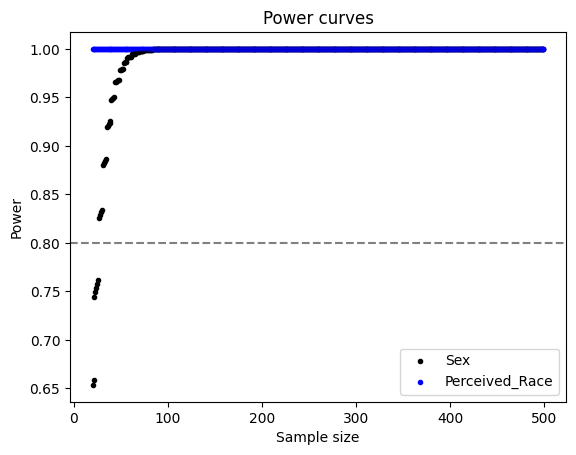

In [2170]:
# create a range of sample sizes to test
sample_sizes = range(20, 500)

# perform power analysis for each sample size and plot the results
tt = TTestIndPower()
fig, ax = plt.subplots()
for i, nobs_5 in enumerate(sample_sizes):
    nobs_6 = int(nobs_5 * (2.2885294561770952/10)) # keep the ratio of n2/n1 constant
    power5 = tt.solve_power(effect_size=np.abs(d5), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
    power6 = tt.solve_power(effect_size=np.abs(d6), nobs1=nobs_5, alpha=alpha, power=None, ratio=nobs_6/nobs_5)
    ax.scatter(nobs_5, power5, color='black', marker='.')
    ax.scatter(nobs_5, power6, color='blue', marker='.')
    
ax.axhline(power, color='gray', linestyle='--', label='Desired power')
ax.set_xlabel('Sample size')
ax.set_ylabel('Power')
ax.set_title('Power curves')
ax.legend(['Sex', 'Perceived_Race'])
plt.show()

In [2171]:
#1 Perform the ANCOVA


model_1 = sm.formula.ols('StripSearch ~ Actions_at_arrest___Concealed_i + Arrest_Year', data=dataG).fit()

print(model_1.summary())



                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     3635.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:53:02   Log-Likelihood:                -15687.
No. Observations:               65276   AIC:                         3.138e+04
Df Residuals:                   65273   BIC:                         3.141e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2172]:
#1 Perform the ANCOVA


model_2 = sm.formula.ols('StripSearch ~ Actions_at_arrest___Combative__ + Arrest_Year', data=dataG).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3720.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:53:02   Log-Likelihood:                -15610.
No. Observations:               65276   AIC:                         3.123e+04
Df Residuals:                   65273   BIC:                         3.125e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2173]:
model_3 = sm.formula.ols('StripSearch ~ Actions_at_arrest___Resisted__d + Arrest_Year', data=dataG).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     3596.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:53:02   Log-Likelihood:                -15722.
No. Observations:               65276   AIC:                         3.145e+04
Df Residuals:                   65273   BIC:                         3.148e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2174]:
model_4 = sm.formula.ols('StripSearch ~ Actions_at_arrest___Assaulted_o + Arrest_Year', data=dataG).fit()

print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     3550.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:53:02   Log-Likelihood:                -15763.
No. Observations:               65276   AIC:                         3.153e+04
Df Residuals:                   65273   BIC:                         3.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2175]:
model_concealed = sm.formula.ols('StripSearch ~ Sex + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2350.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:53:02   Log-Likelihood:                -15785.
No. Observations:               65276   AIC:                         3.158e+04
Df Residuals:                   65272   BIC:                         3.161e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     407.9568      4.875     83.677      

In [2176]:
model_concealed = sm.formula.ols('StripSearch ~ Perceived_Race + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     823.1
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:53:03   Log-Likelihood:                -15624.
No. Observations:               65276   AIC:                         3.127e+04
Df Residuals:                   65266   BIC:                         3.136e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             406.6021    

In [2177]:
model_concealed = sm.formula.ols('Booked ~ Actions_at_arrest___Concealed_i + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     72.83
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           2.54e-32
Time:                        15:53:03   Log-Likelihood:                -47254.
No. Observations:               65276   AIC:                         9.451e+04
Df Residuals:                   65273   BIC:                         9.454e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2178]:
model_concealed = sm.formula.ols('Booked ~ Actions_at_arrest___Combative__ + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     471.9
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          3.41e-204
Time:                        15:53:03   Log-Likelihood:                -46859.
No. Observations:               65276   AIC:                         9.372e+04
Df Residuals:                   65273   BIC:                         9.375e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2179]:
model_concealed = sm.formula.ols('Booked ~ Actions_at_arrest___Resisted__d + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     166.3
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           9.53e-73
Time:                        15:53:03   Log-Likelihood:                -47161.
No. Observations:               65276   AIC:                         9.433e+04
Df Residuals:                   65273   BIC:                         9.436e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2180]:
model_concealed = sm.formula.ols('Booked ~ Actions_at_arrest___Assaulted_o + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           5.62e-48
Time:                        15:53:03   Log-Likelihood:                -47218.
No. Observations:               65276   AIC:                         9.444e+04
Df Residuals:                   65273   BIC:                         9.447e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [2181]:
model_concealed = sm.formula.ols('Booked ~ Sex + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     169.4
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          2.11e-109
Time:                        15:53:03   Log-Likelihood:                -47074.
No. Observations:               65276   AIC:                         9.416e+04
Df Residuals:                   65272   BIC:                         9.419e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      59.8539      7.874      7.602      

In [2182]:
model_concealed = sm.formula.ols('Booked ~ Perceived_Race + Arrest_Year', data=dataG).fit()

print(model_concealed.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     25.73
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           9.51e-45
Time:                        15:53:03   Log-Likelihood:                -47211.
No. Observations:               65276   AIC:                         9.444e+04
Df Residuals:                   65266   BIC:                         9.453e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              59.8686    

In [2183]:
#logisticregression

In [2184]:
#logisticregression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Define the dependent and independent variables
y = dataG['StripSearch']
X = dataG[['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.686294
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52218
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                 -0.8720
Time:                        15:53:04   Log-Likelihood:                -35838.
converged:                       True   LL-Null:                       -19144.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Actions_at_arrest___Concealed_i    -0.0788      0.139     -0.566  

In [2185]:
#getting odds ratio 
np.exp(result.params)

Actions_at_arrest___Concealed_i    0.924244
Actions_at_arrest___Combative__    0.296065
dtype: float64

In [2186]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Actions_at_arrest___Concealed_i,0.703618,1.214049,0.924244
Actions_at_arrest___Combative__,0.268516,0.326442,0.296065


In [2187]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = result.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

In [2188]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.8818167892156863


In [2189]:
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[11513     0]
 [ 1543     0]]


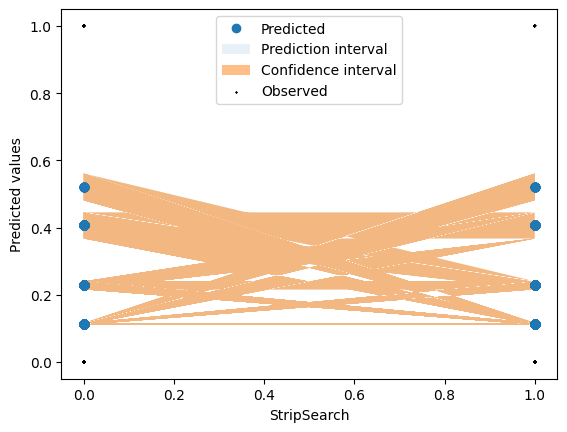

In [2190]:

# fit a linear regression model to the data
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# generate predicted values and confidence intervals for a range of input values
X_pred = sm.add_constant(X)
pred = model.get_prediction(X_pred)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# plot the predicted values and confidence intervals
plt.plot(y, pred_mean, 'o', label='Predicted')
plt.fill_between(y, pred_ci[:, 0], pred_ci[:, 1], alpha=0.1, label='Prediction interval')
plt.fill_between(y, pred.conf_int().T[0], pred.conf_int().T[1], alpha=.5, label='Confidence interval')
plt.scatter(y, dataG['Actions_at_arrest___Concealed_i'], dataG['Actions_at_arrest___Combative__'], label='Observed', marker='x', color='black')
plt.xlabel('StripSearch')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [2191]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Define the dependent and independent variables
y = dataG['StripSearch']
X = dataG[['Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Assaulted_o']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fit the logistic regression model
logit_model_01 = sm.Logit(y_train, X_train)
result_01 = logit_model_01.fit()

# Print the summary of the logistic regression model
print(result_01.summary())

Optimization terminated successfully.
         Current function value: 0.685423
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52218
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                 -0.8654
Time:                        15:53:05   Log-Likelihood:                -35793.
converged:                       True   LL-Null:                       -19188.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Actions_at_arrest___Resisted__d    -1.3663      0.057    -24.163  

In [2192]:
#getting odds ratio 
np.exp(result_01.params)

Actions_at_arrest___Resisted__d    0.255047
Actions_at_arrest___Assaulted_o    0.474043
dtype: float64

In [2193]:
params = result_01.params
conf = result_01.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Actions_at_arrest___Resisted__d,0.228291,0.284938,0.255047
Actions_at_arrest___Assaulted_o,0.368781,0.609351,0.474043


In [2194]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_2 = result_01.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_2 = list(map(round, pred_2))

In [2195]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_2))


Test accuracy =  0.8835018382352942


In [2196]:
cm = confusion_matrix(y_test, prediction_2) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[11535     0]
 [ 1521     0]]


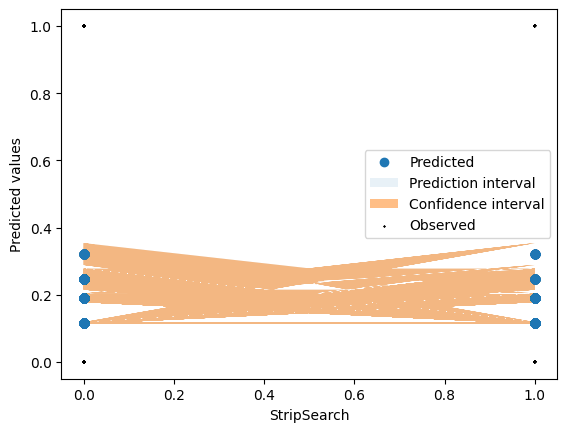

In [2197]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt



# fit a linear regression model to the data
X = sm.add_constant(X)
model_001 = sm.OLS(y, X).fit()

# generate predicted values and confidence intervals for a range of input values
X_pred = sm.add_constant(X)
pred = model_001.get_prediction(X_pred)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# plot the predicted values and confidence intervals
plt.plot(y, pred_mean, 'o', label='Predicted')
plt.fill_between(y, pred_ci[:, 0], pred_ci[:, 1], alpha=0.1, label='Prediction interval')
plt.fill_between(y, pred.conf_int().T[0], pred.conf_int().T[1], alpha=.5, label='Confidence interval')
plt.scatter(y, dataG['Actions_at_arrest___Resisted__d'], dataG['Actions_at_arrest___Assaulted_o'], label='Observed', marker='x', color='black')
plt.xlabel('StripSearch')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


In [2198]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Define the dependent and independent variables
y = dataG['Booked']
X = dataG[['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.685006
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Booked   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52218
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                 0.01082
Time:                        15:53:07   Log-Likelihood:                -35771.
converged:                       True   LL-Null:                       -36162.
Covariance Type:            nonrobust   LLR p-value:                3.138e-172
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Actions_at_arrest___Concealed_i     1.2794      0.173      7.381  

In [2199]:
#getting odds ratio 
np.exp(result.params)

Actions_at_arrest___Concealed_i    3.594555
Actions_at_arrest___Combative__    3.564273
dtype: float64

In [2200]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Actions_at_arrest___Concealed_i,2.559142,5.048889,3.594555
Actions_at_arrest___Combative__,3.226502,3.937404,3.564273


In [2201]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = result.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

In [2202]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.5036764705882353


In [2203]:
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[6073  121]
 [6359  503]]


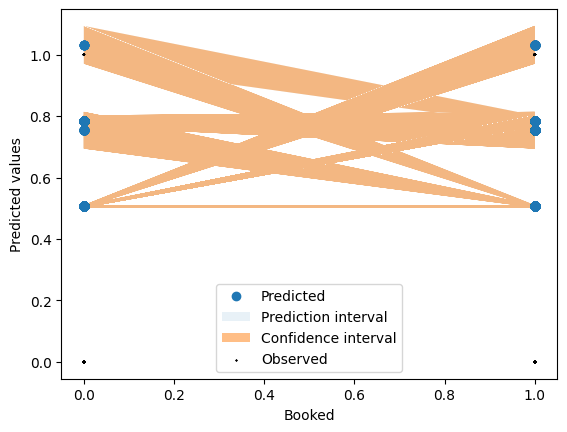

In [2204]:
X = sm.add_constant(X)
model_002 = sm.OLS(y, X).fit()

# generate predicted values and confidence intervals for a range of input values
X_pred = sm.add_constant(X)
pred = model_002.get_prediction(X_pred)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# plot the predicted values and confidence intervals
plt.plot(y, pred_mean, 'o', label='Predicted')
plt.fill_between(y, pred_ci[:, 0], pred_ci[:, 1], alpha=0.1, label='Prediction interval')
plt.fill_between(y, pred.conf_int().T[0], pred.conf_int().T[1], alpha=.5, label='Confidence interval')
plt.scatter(y, dataG['Actions_at_arrest___Concealed_i'], dataG['Actions_at_arrest___Combative__'], label='Observed', marker='x', color='black')
plt.xlabel('Booked')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [2205]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Define the dependent and independent variables
y = dataG['Booked']
X = dataG[['Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Assaulted_o']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fit the logistic regression model
logit_model_01 = sm.Logit(y_train, X_train)
result_01 = logit_model_01.fit()

# Print the summary of the logistic regression model
print(result_01.summary())

Optimization terminated successfully.
         Current function value: 0.689549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Booked   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52218
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                0.004144
Time:                        15:53:08   Log-Likelihood:                -36008.
converged:                       True   LL-Null:                       -36158.
Covariance Type:            nonrobust   LLR p-value:                 3.907e-67
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Actions_at_arrest___Resisted__d     0.6908      0.048     14.262  

In [2206]:
#getting odds ratio 
np.exp(result_01.params)

Actions_at_arrest___Resisted__d    1.995346
Actions_at_arrest___Assaulted_o    4.198394
dtype: float64

In [2207]:
params = result_01.params
conf = result_01.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Actions_at_arrest___Resisted__d,1.814627,2.194063,1.995346
Actions_at_arrest___Assaulted_o,3.143713,5.606909,4.198394


In [2208]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_2 = result_01.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_2 = list(map(round, pred_2))

In [2209]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_2))


Test accuracy =  0.49777879901960786


In [2210]:
cm = confusion_matrix(y_test, prediction_2) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[6084  168]
 [6389  415]]


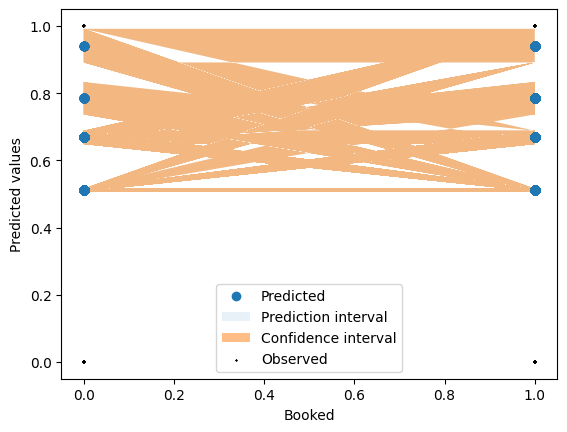

In [2211]:
X = sm.add_constant(X)
model_003 = sm.OLS(y, X).fit()

# generate predicted values and confidence intervals for a range of input values
X_pred = sm.add_constant(X)
pred = model_003.get_prediction(X_pred)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# plot the predicted values and confidence intervals
plt.plot(y, pred_mean, 'o', label='Predicted')
plt.fill_between(y, pred_ci[:, 0], pred_ci[:, 1], alpha=0.1, label='Prediction interval')
plt.fill_between(y, pred.conf_int().T[0], pred.conf_int().T[1], alpha=.5, label='Confidence interval')
plt.scatter(y, dataG['Actions_at_arrest___Resisted__d'], dataG['Actions_at_arrest___Assaulted_o'], label='Observed', marker='x', color='black')
plt.xlabel('Booked')
plt.ylabel('Predicted values')
plt.legend()
plt.show()